# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [2]:
%matplotlib inline
# import numpy and pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [3]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [4]:
# Your code here:

fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [5]:
# Your code here:
ValueNumeric = [float(element.strip('€MK')) for element in fifa.Value]

fifa['ValueNumeric'] = ValueNumeric

fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [6]:
# Your code here:

from scipy.stats import f_oneway
from statsmodels.formula.api import ols
import statsmodels.api as sm


df = fifa[['ValueNumeric', 'Position', 'Preferred Foot']]
df.columns = ['ValueNumeric', 'Position', 'Foot']

model = ols('ValueNumeric ~ Foot + C(Position)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Foot,7.292211e+04,1.0,0.871795,3.504713e-01
C(Position),8.767522e+06,26.0,4.031426,2.192419e-11
Residual,1.515581e+09,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

Cuanto mayor es el valor F, mas estarán relacionadas las variables, por tanto el Value se relaciona más con la posición de juego que con el foot. El P-value es la columna de la derecha que en los 3 casos es menor que 0.05 y por tanto significativa (we reject the null). En ambos casos, tanto la posicion con en el pie de juego influyen en mayor o menor medida sobre el valor del jugador.


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [7]:
# Your code here:

dfNat = fifa[['ValueNumeric', 'Nationality']]


modelNat = ols('ValueNumeric ~ C(Nationality)', data=dfNat).fit()
anova_tableNat = sm.stats.anova_lm(modelNat, typ=2)
anova_tableNat

,sum_sq,df,F,PR(>F)
C(Nationality),4.292914e+07,163.0,3.202987,1.976253e-38
Residual,1.483605e+09,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

La Nacionalidad del jugador influye en su valor, ya que vemos que el p value es muy pequeño por lo tanto significativo y el F-test es alto.

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [8]:
# Your code here:

fifa.dropna(inplace= True)


Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [9]:
# Your code here:

x = sm.add_constant(fifa[['Stamina', 'SprintSpeed']])
y = fifa.ValueNumeric

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model) 

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Fri, 22 Feb 2019   Prob (F-statistic):             0.0116
Time:                        10:10:16   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

El R squared es 0.0, eso quiere decir que la relación de las tres variables no puede explicarse mediante una regresión lineal; no podemos usar la ecuación para predecir y, la variable independiente (o const. en la tabla).

F-test es grande y el P-value es pequeño (we reject the null hypothesis) por lo que las variables dependientes (Stamina y Speed) influyen en el valor del jugador.


Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [10]:
# Your code here:

x = sm.add_constant(fifa.Potential)
y = fifa.ValueNumeric

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):          9.15e-225
Time:                        10:20:22   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.0

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

El R Squared es muy bajo, por lo que la relación de las dos variables no puede explicarse con una relación lineal.

El P value es muy bajo (we reject the null) y F-test es muy grande por lo que el Potencial del jugador influye en su valor.

La ecuación de la recta de la regresión sería: y = 1062.4312 - 11.1326x . La R cuadrado nos dice
que el 5,6% de la variación del valor podría explicarse por la variable Potencial, por lo que la capacidad de 
predicción del modelo es bastante baja.


Plot a scatter plot of value vs. potential. Do you see a linear relationship?

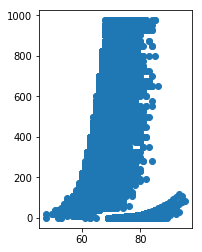

In [11]:
# Your code here:

def linearRegStats(x,y):

    X = sm.add_constant(x) 
    Y = y

    model = sm.OLS(Y, X).fit()
    predictions = model.predict(X) 
    print_model = model.summary()
    plt.scatter(x,y)    
    
plt.subplot(1,2,1)
linearRegStats(fifa.Potential, fifa.ValueNumeric)